In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

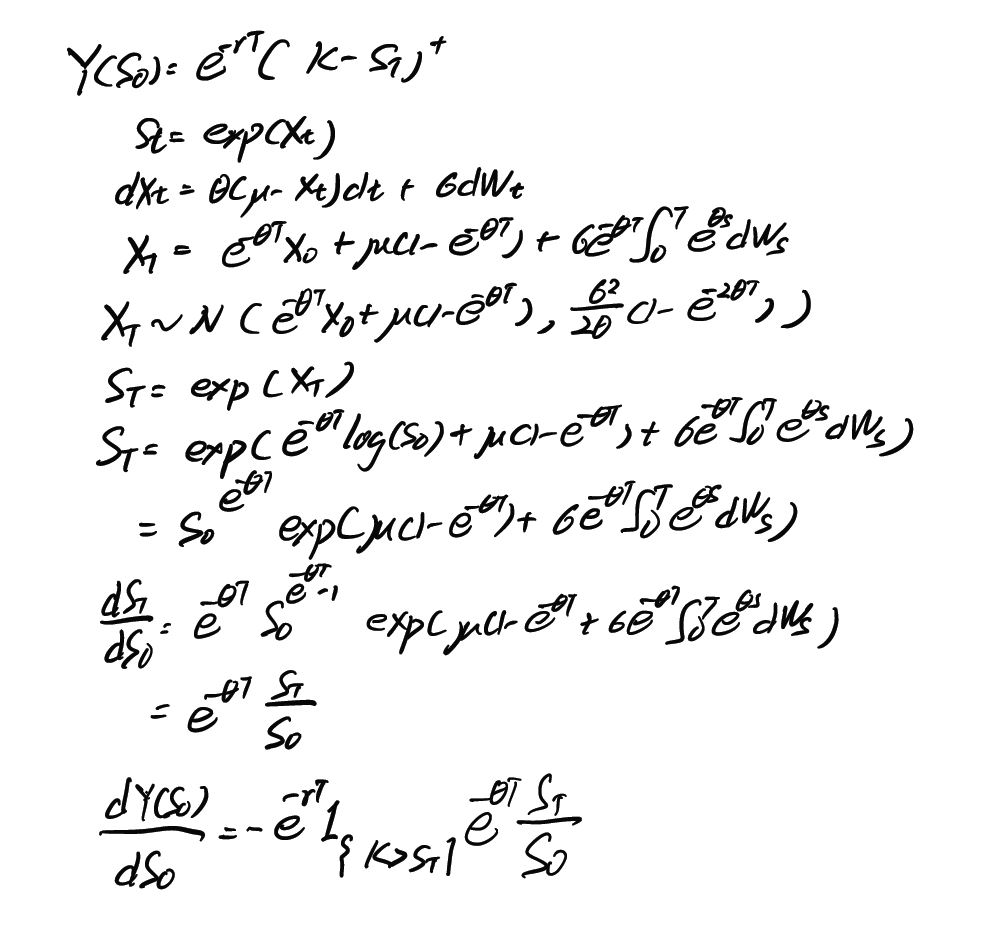

# Q1

In [2]:
K_space = [90, 100, 110]
S0, mu, theta, sigma, r, T = 100, 4.6, 0.1, 0.3, 0.01, 1
X0 = np.log(S0)
N = 1000000
Deltas_mean = []
Deltas_var = []

Z = np.random.randn(N)

for K in K_space:
    XT = Z * np.sqrt(sigma**2/(2*theta)*(1-np.exp(-2*theta*T))) + \
                np.exp(-theta*T)*X0+mu*(1-np.exp(-theta*T))
    ST = np.exp(XT)
    Deltas = -np.exp(-r*T)*(K>ST) * np.exp(-theta*T)*ST/S0
    Deltas_mean.append(np.mean(Deltas))
    Deltas_var.append(np.var(Deltas))

In [3]:
Table1 = pd.DataFrame(columns = ['K = 90', 'K = 100', 'K = 110'])
Table1.loc['PW Estimate'] = Deltas_mean
Table1.loc['Variance of PW Estimator'] = Deltas_var
print(Table1)

                            K = 90   K = 100   K = 110
PW Estimate              -0.239595 -0.361575 -0.484007
Variance of PW Estimator  0.106792  0.137335  0.148922


# Q2

In [4]:
def blsprice(S, K, r, t, sigma):
    sp = S 
    rfrate = r

    d1 = (np.log(sp/K)+rfrate*t)/(sigma*np.sqrt(t)) + sigma*np.sqrt(t)/2
    d2 = d1 - sigma*np.sqrt(t)

    c = sp*st.norm.cdf(d1) - np.exp(-rfrate*t)*K*st.norm.cdf(d2)

    return c

S0, sigma, r, T, K1, K2, L = 100, 0.25, 0.01, 1, 100, 110, 90
N = 100000
Z = np.random.randn(N)

ST2 = S0*np.exp((r-sigma**2/2)*T/2 + sigma*np.sqrt(T/2)*Z)
H = (ST2<=L)*blsprice(ST2,K1,r,T/2,sigma) + \
    (ST2>L)*blsprice(ST2,K2,r,T/2,sigma)
Delta = np.mean(np.exp(-r*T/2)*H*Z/(S0*sigma*np.sqrt(T/2)))

print(Delta)

0.405181175046774


# Q3

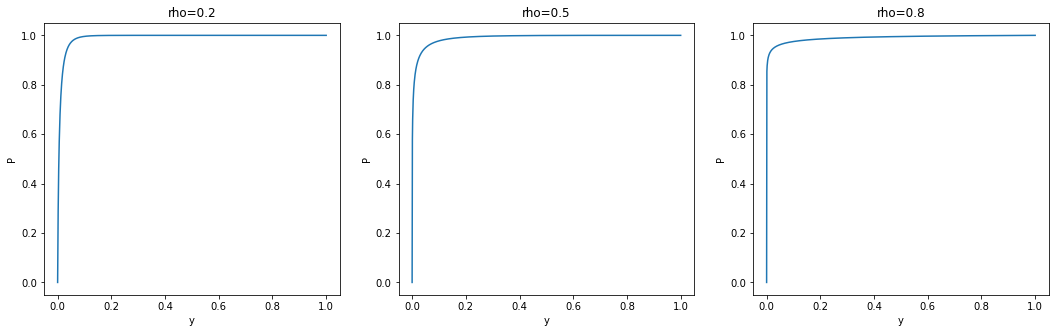

In [6]:
p = 0.01
rho_space = [0.2, 0.5, 0.8]
y = np.linspace(0, 1, 1000)
P = []

for rho in rho_space:
    P_rho = st.norm.cdf((st.norm.ppf(1-p)-np.sqrt(1-rho)*st.norm.ppf(1-y))/\
              np.sqrt(rho))
    P.append(P_rho)

fig, ax = plt.subplots(1, 3, figsize=(18,5))

for k in range(3):
    ax[k].plot(y, P[k])  
    ax[k].set_xlabel('y')
    ax[k].set_ylabel('P')
    ax[k].set_title(f'rho={rho_space[k]}')

plt.show()

## Method1

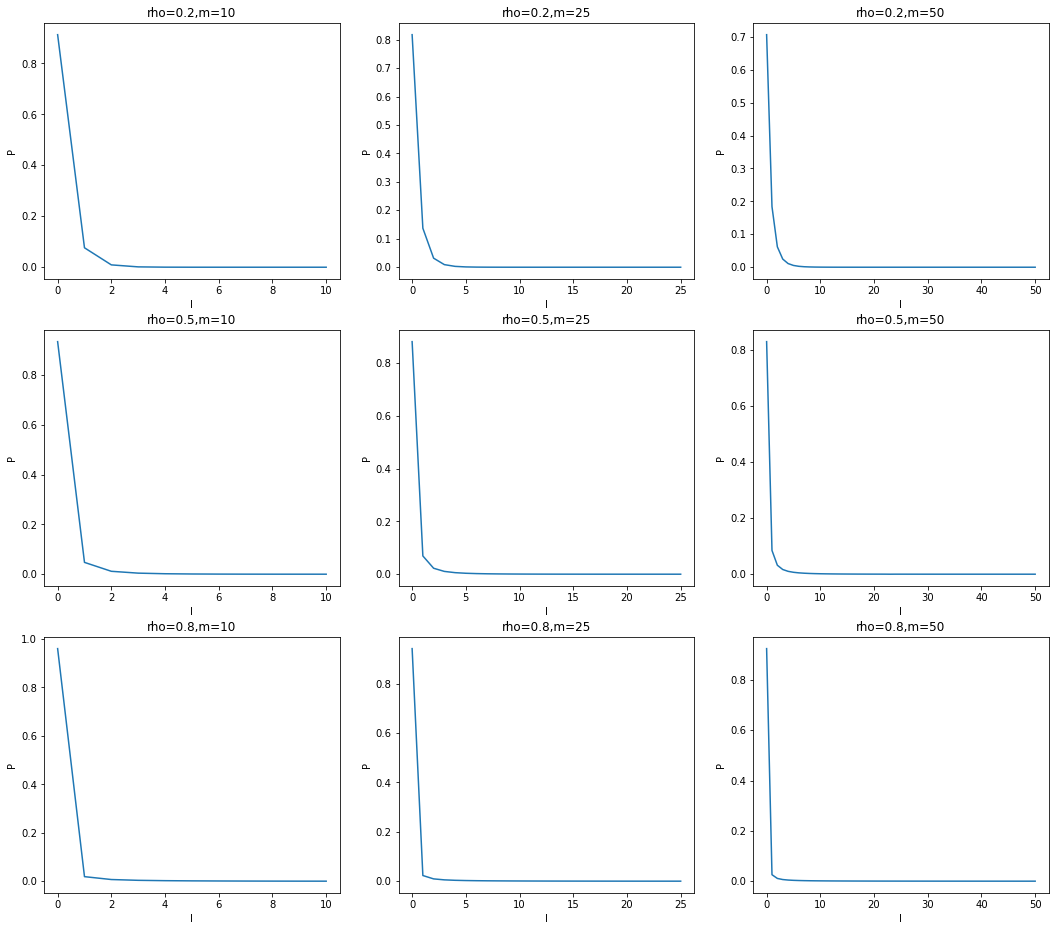

In [7]:
from scipy.integrate import quad
import math

p = 0.01
rho_space = [0.2, 0.5, 0.8]
m_space = [10, 25, 50]

x = st.norm.ppf(1-p)

fig, ax = plt.subplots(3, 3, figsize=(18,16))

def integrand(z, m, l, rho):
    Cml = math.factorial(m)/(math.factorial(l)*math.factorial(m-l))
    pz = 1-st.norm.cdf((x-np.sqrt(rho)*z)/np.sqrt(1-rho))
    return Cml * pz**l * (1-pz)**(m-l) * st.norm.pdf(z)

for index_rho,rho in enumerate(rho_space):
    for index_m,m in enumerate(m_space):
        L = list(range(0, m+1))
        P_L = []
        for l in L:
            P = quad(integrand, -np.inf, np.inf, args=(m,l,rho))[0]
            P_L.append(P)
        ax[index_rho][index_m].plot(L, P_L)
        ax[index_rho][index_m].set_xlabel('l')
        ax[index_rho][index_m].set_ylabel('P')
        ax[index_rho][index_m].set_title(f'rho={rho},m={m}')

plt.show()

## Method2

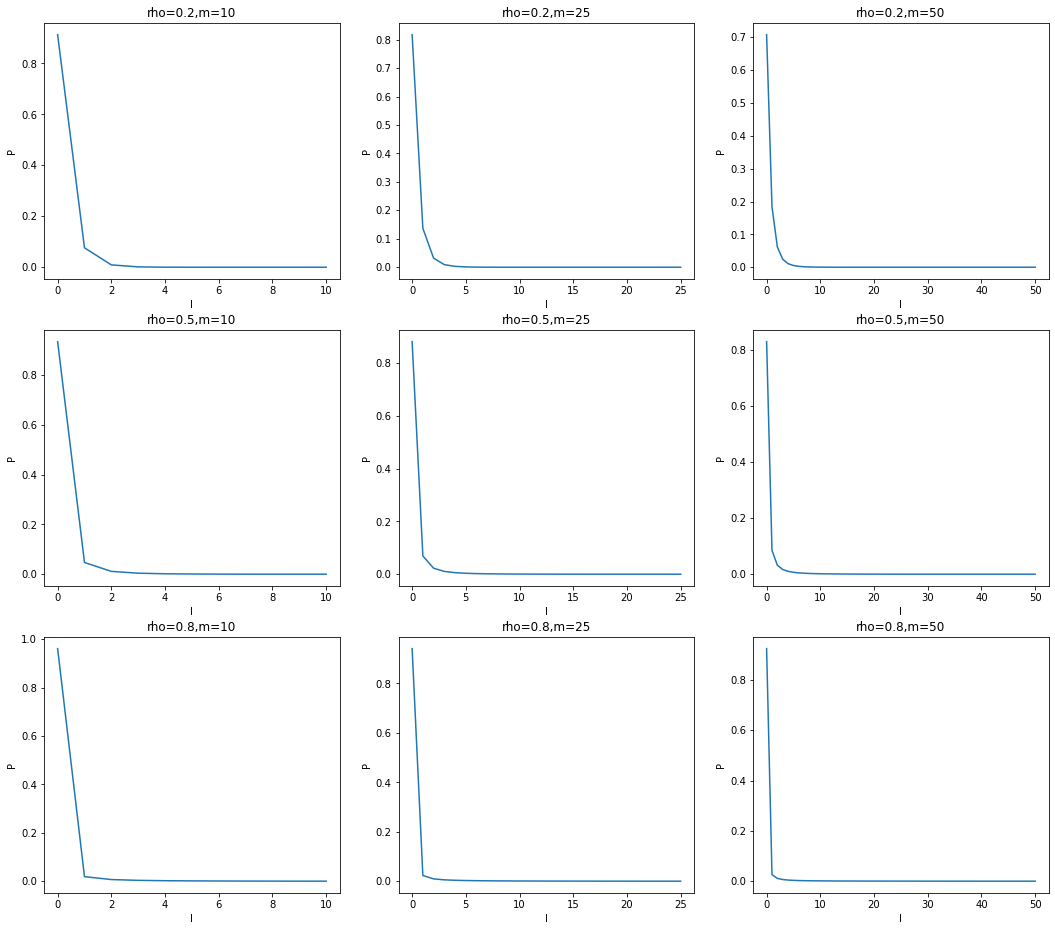

In [8]:
import math

p = 0.01
rho_space = [0.2, 0.5, 0.8]
m_space = [10, 25, 50]
N = 100000

x = st.norm.ppf(1-p)

fig, ax = plt.subplots(3, 3, figsize=(18,16))

for index_rho,rho in enumerate(rho_space):
    for index_m,m in enumerate(m_space):
        L = list(range(0, m+1))
        P_L = []
        for l in L:
            z = np.random.randn(N)
            pz = 1-st.norm.cdf((x-np.sqrt(rho)*z)/np.sqrt(1-rho))
            P = np.mean(math.comb(m,l)*pz**l*(1-pz)**(m-l))
            P_L.append(P)
        ax[index_rho][index_m].plot(L, P_L)
        ax[index_rho][index_m].set_xlabel('l')
        ax[index_rho][index_m].set_ylabel('P')
        ax[index_rho][index_m].set_title(f'rho={rho},m={m}')

plt.show()

P(L>10)= 0.00769


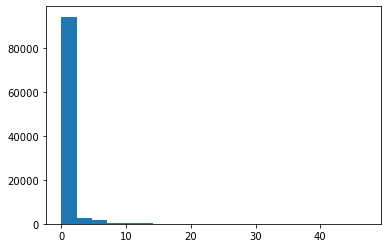

In [9]:
rho = 0.5
p = 0.01
m = 50
x = st.norm.ppf(1-p)
L = []

for _ in range(100000):
    Z = np.random.randn(1)
    eps = np.random.randn(m)
    X = np.sqrt(rho)*Z + np.sqrt(1-rho)*eps
    Y = X>x
    L.append(np.sum(Y))

plt.hist(L,20)
print('P(L>10)=', sum(np.array(L)>10)/len(L))